### Install & import dependencies

In [58]:
%pip install ndlib --quiet
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [37]:
import networkx as nx
import ndlib.models.ModelConfig as mc
from custommodels.CascadeModel import CascadeModel
import random
import matplotlib.pyplot as plt
import numpy as np
from custommodels.SpreadingModels import ThresholdModel, CascadeModel

### Load data

In [38]:
path = "../data/loc-brightkite_edges.txt.gz"
G = nx.read_edgelist(path, create_using=nx.Graph(), nodetype=int)

# Step 2. Make the disease spread on all four models

1. Adding the the code for the models (threshold and cascade) and the code to import the pickle with degree and betweeness


### Highest degree nodes:

In [28]:
# Code for saving and loading data
import pickle
def load(file):
    try:
        with open(f"../data/{file}", 'rb') as f:
            data = pickle.load(f)
            print("Successfully loaded previous data.")
            return data
    except FileNotFoundError:
        print("Failed to load data.")
        raise FileNotFoundError(f"File not found, please run the code first and save it using save(\"{file}\", data)")
def save(file, data):
    with open(f"../data/{file}", 'wb') as f:
        pickle.dump(data, f)

In [29]:
sorted_degree_list = load("sorted_degree.pkl")
sorted_degree_list

Successfully loaded previous data.


[(40, 1134),
 (44, 1055),
 (108, 854),
 (116, 838),
 (159, 833),
 (36, 779),
 (191, 732),
 (49, 569),
 (634, 550),
 (156, 475),
 (35, 467),
 (207, 453),
 (651, 448),
 (3245, 404),
 (250, 386),
 (2625, 379),
 (1093, 354),
 (163, 343),
 (405, 337),
 (833, 334),
 (1100, 333),
 (27, 332),
 (212, 327),
 (112, 326),
 (6365, 325),
 (1302, 321),
 (214, 311),
 (148, 310),
 (102, 306),
 (146, 301),
 (209, 299),
 (6991, 296),
 (1076, 292),
 (446, 289),
 (1878, 282),
 (719, 274),
 (195, 272),
 (2812, 271),
 (176, 270),
 (1143, 270),
 (2349, 270),
 (210, 267),
 (2896, 267),
 (1875, 266),
 (143, 264),
 (3, 259),
 (6895, 257),
 (7170, 256),
 (30, 254),
 (676, 253),
 (2904, 253),
 (2850, 248),
 (680, 242),
 (241, 241),
 (7, 230),
 (10346, 230),
 (174, 228),
 (1082, 228),
 (2829, 228),
 (1386, 227),
 (1877, 226),
 (2953, 225),
 (6923, 225),
 (2893, 221),
 (620, 218),
 (2314, 218),
 (901, 215),
 (262, 214),
 (2880, 214),
 (6640, 213),
 (13909, 213),
 (6589, 212),
 (301, 211),
 (144, 210),
 (161, 210),
 

In [30]:
top_degree_nodes = []
for b in sorted_degree_list[:int(len(sorted_degree_list)*0.1)]:

    top_degree_nodes.append(b[0])
print(top_degree_nodes)


[40, 44, 108, 116, 159, 36, 191, 49, 634, 156, 35, 207, 651, 3245, 250, 2625, 1093, 163, 405, 833, 1100, 27, 212, 112, 6365, 1302, 214, 148, 102, 146, 209, 6991, 1076, 446, 1878, 719, 195, 2812, 176, 1143, 2349, 210, 2896, 1875, 143, 3, 6895, 7170, 30, 676, 2904, 2850, 680, 241, 7, 10346, 174, 1082, 2829, 1386, 1877, 2953, 6923, 2893, 620, 2314, 901, 262, 2880, 6640, 13909, 6589, 301, 144, 161, 229, 1876, 168, 189, 2934, 9574, 2189, 2819, 2811, 661, 1914, 2874, 1057, 6908, 1864, 9577, 2278, 1168, 1318, 3596, 10350, 417, 637, 295, 2218, 2881, 8946, 2868, 6933, 527, 375, 1501, 157, 277, 659, 349, 1307, 1880, 2816, 10344, 1898, 1860, 2966, 80, 948, 1304, 10614, 1013, 2823, 2915, 2929, 4841, 164, 298, 638, 646, 2822, 10375, 155, 652, 736, 2844, 1158, 317, 636, 2168, 2180, 3173, 1531, 2902, 1331, 1786, 2836, 1955, 208, 280, 2261, 6916, 14294, 149, 1207, 1895, 2815, 2834, 6907, 8467, 10380, 10632, 686, 1138, 1936, 2825, 45, 69, 8440, 3109, 305, 1017, 10373, 17, 1073, 2862, 2919, 415, 281, 20

### Highest betweeness centrality nodes:

In [31]:
betweenness = (load("betweenness_centrality.pkl"))
betweenness = list(betweenness.items())


Successfully loaded previous data.


In [32]:
top_betweenness_nodes = []
for b in betweenness[:int(len(betweenness)*0.1)]:

    top_betweenness_nodes.append(b[0])
print(top_betweenness_nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

## Cascade model infecting top 10% highest degree nodes 

In [33]:
cascade_degree = CascadeModel(G)
beta, gamma = 0.21204, 0.1
cascade_degree.set_parameters(beta, gamma)
# Get random 1% of nodes as initial infected
percentage = 0.05
initial_infected = top_degree_nodes
cascade_degree.set_initial_infected(initial_infected)
results = cascade_degree.iterate(40)

# Info
# Number at final step
final_sus = list(results[-1][0].values()).count(0)
final_inf = list(results[-1][0].values()).count(1)
final_rec = list(results[-1][0].values()).count(2)
print(f"Final susceptible: {final_sus}")
print(f"Final infected: {final_inf}")
print(f"Final recovered: {final_rec}")

Final susceptible: 1991
Final infected: 958
Final recovered: 55279


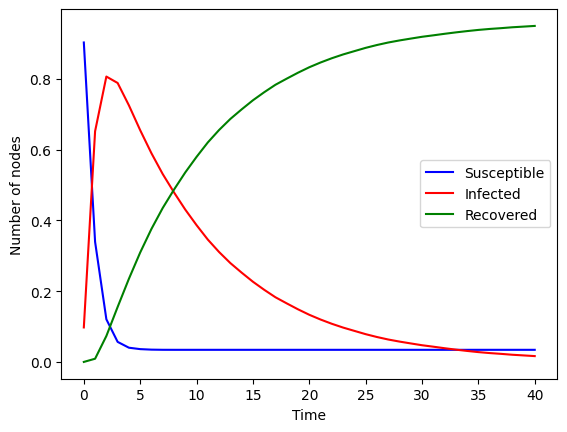

In [34]:
# Plotting  the graph
num_susceptible = [len(G.nodes) - len(initial_infected)]
num_infected = [len(initial_infected)]
num_recovered = [0]
for state, i, r in results:
    num_susceptible.append(list(state.values()).count(0))
    num_infected.append(list(state.values()).count(1))
    num_recovered.append(list(state.values()).count(2))

num_susceptible = np.array(num_susceptible)
num_infected = np.array(num_infected)
num_recovered = np.array(num_recovered)
# print(num_susceptible, num_infected, num_recovered)

# get proportion
prop_susceptible = num_susceptible / len(G.nodes)
prop_infected = num_infected / len(G.nodes)
prop_recovered = num_recovered / len(G.nodes)

plt.plot(prop_susceptible, label="Susceptible", color="blue")
plt.plot(prop_infected, label="Infected", color="red")
plt.plot(prop_recovered, label="Recovered", color="green")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of nodes")
plt.show()

## Threshold model infecting top 10% highest degree nodes 

In [13]:
model = ThresholdModel(G)
theta, gamma = 0.21204, 0.1
model.set_parameters(theta, gamma)
# Initial infected
percentage = 0.01
initial_infected = top_degree_nodes
model.set_initial_infected(initial_infected)
results = model.iterate(40)

# Info
# Number at final step
final_sus = list(results[-1][0].values()).count(0)
final_inf = list(results[-1][0].values()).count(1)
final_rec = list(results[-1][0].values()).count(2)
print(f"Final susceptible: {final_sus}")
print(f"Final infected: {final_inf}")
print(f"Final recovered: {final_rec}")

Final susceptible: 1489
Final infected: 939
Final recovered: 55800


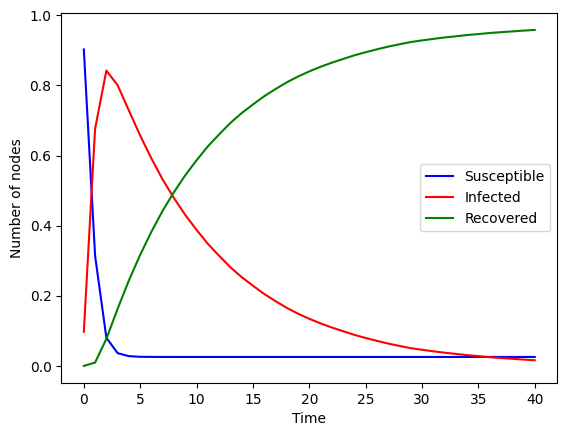

In [14]:
# Plotting  the graph
num_susceptible = [len(G.nodes) - len(initial_infected)]
num_infected = [len(initial_infected)]
num_recovered = [0]
for state, i, r in results:
    num_susceptible.append(list(state.values()).count(0))
    num_infected.append(list(state.values()).count(1))
    num_recovered.append(list(state.values()).count(2))

num_susceptible = np.array(num_susceptible)
num_infected = np.array(num_infected)
num_recovered = np.array(num_recovered)
# print(num_susceptible, num_infected, num_recovered)

# get proportion
prop_susceptible = num_susceptible / len(G.nodes)
prop_infected = num_infected / len(G.nodes)
prop_recovered = num_recovered / len(G.nodes)

plt.plot(prop_susceptible, label="Susceptible", color="blue")
plt.plot(prop_infected, label="Infected", color="red")
plt.plot(prop_recovered, label="Recovered", color="green")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of nodes")
plt.show()

## Cascade model with top 10% highest betweeness centrality nodes

In [16]:
cascade_degree = CascadeModel(G)
beta, gamma = 0.21204, 0.1
cascade_degree.set_parameters(beta, gamma)
# Get random 1% of nodes as initial infected
percentage = 0.05
initial_infected = top_betweenness_nodes
cascade_degree.set_initial_infected(initial_infected)
results = cascade_degree.iterate(40)

# Info
# Number at final step
final_sus = list(results[-1][0].values()).count(0)
final_inf = list(results[-1][0].values()).count(1)
final_rec = list(results[-1][0].values()).count(2)
print(f"Final susceptible: {final_sus}")
print(f"Final infected: {final_inf}")
print(f"Final recovered: {final_rec}")

Final susceptible: 2248
Final infected: 994
Final recovered: 54986


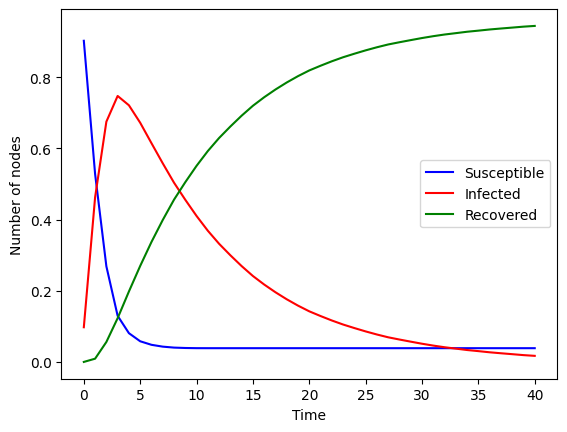

In [17]:
# Plotting  the graph
num_susceptible = [len(G.nodes) - len(initial_infected)]
num_infected = [len(initial_infected)]
num_recovered = [0]
for state, i, r in results:
    num_susceptible.append(list(state.values()).count(0))
    num_infected.append(list(state.values()).count(1))
    num_recovered.append(list(state.values()).count(2))

num_susceptible = np.array(num_susceptible)
num_infected = np.array(num_infected)
num_recovered = np.array(num_recovered)
# print(num_susceptible, num_infected, num_recovered)

# get proportion
prop_susceptible = num_susceptible / len(G.nodes)
prop_infected = num_infected / len(G.nodes)
prop_recovered = num_recovered / len(G.nodes)

plt.plot(prop_susceptible, label="Susceptible", color="blue")
plt.plot(prop_infected, label="Infected", color="red")
plt.plot(prop_recovered, label="Recovered", color="green")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of nodes")
plt.show()

## Threshold model with top 10% highest betweeness centrality nodes

In [18]:
model = ThresholdModel(G)
theta, gamma = 0.21204, 0.1
model.set_parameters(theta, gamma)
# Initial infected
percentage = 0.01
initial_infected = top_betweenness_nodes
model.set_initial_infected(initial_infected)
results = model.iterate(40)

# Info
# Number at final step
final_sus = list(results[-1][0].values()).count(0)
final_inf = list(results[-1][0].values()).count(1)
final_rec = list(results[-1][0].values()).count(2)
print(f"Final susceptible: {final_sus}")
print(f"Final infected: {final_inf}")
print(f"Final recovered: {final_rec}")

Final susceptible: 1489
Final infected: 939
Final recovered: 55800


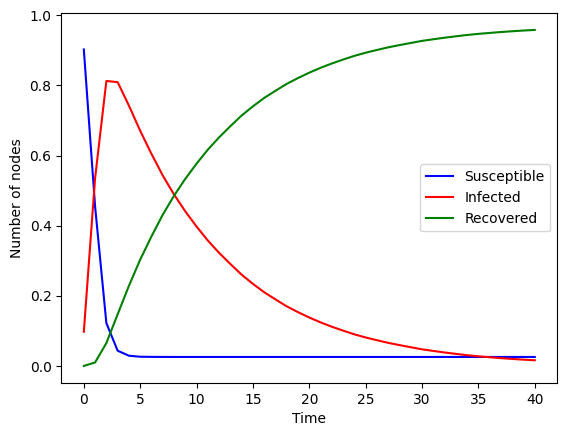

In [19]:
# Plotting  the graph
num_susceptible = [len(G.nodes) - len(initial_infected)]
num_infected = [len(initial_infected)]
num_recovered = [0]
for state, i, r in results:
    num_susceptible.append(list(state.values()).count(0))
    num_infected.append(list(state.values()).count(1))
    num_recovered.append(list(state.values()).count(2))

num_susceptible = np.array(num_susceptible)
num_infected = np.array(num_infected)
num_recovered = np.array(num_recovered)
# print(num_susceptible, num_infected, num_recovered)

# get proportion
prop_susceptible = num_susceptible / len(G.nodes)
prop_infected = num_infected / len(G.nodes)
prop_recovered = num_recovered / len(G.nodes)

plt.plot(prop_susceptible, label="Susceptible", color="blue")
plt.plot(prop_infected, label="Infected", color="red")
plt.plot(prop_recovered, label="Recovered", color="green")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of nodes")
plt.show()